In [1]:
# importación de liberías necesarias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import pydot 
from IPython.display import Image
from sklearn import tree
from io import StringIO

from joblib import dump

In [2]:
df = pd.read_csv('/content/result.csv')

In [3]:
# mostrar las primeras y últimas filas del dataframe importado
df

,color,fuelTypeId,fuelType,id,km,make,makeId,model,modelId,price,...,year,brand,brand_id,fuel_types,model_id,seller_type,bodyType,cubicCapacity,doors,hp
0,COMMON.COLOR_WHITE,2,Gasolina,51040978,41080,TOYOTA,46,Yaris,322.0,10990,...,2015,TOYOTA,46,Gasolina,322.0,profesional,BODY_TYPE_SEDAN,1329.0,5.0,99.0
1,COMMON.COLOR_BLACK,1,Diesel,50914675,78576,VOLVO,48,V40,285.0,17450,...,2016,VOLVO,48,Diesel,285.0,profesional,BODY_TYPE_SEDAN,1969.0,5.0,120.0
2,COMMON.COLOR_BLACK,1,Diesel,50573084,99999,BMW,7,Serie 3,70.0,20999,...,2015,BMW,7,Diesel,70.0,particular,BODY_TYPE_FAMILIAR,1995.0,5.0,184.0
3,COMMON.COLOR_BROWN,4,Hibrido,51265506,79000,FORD,15,Mondeo,39.0,19990,...,2016,FORD,15,Hibrido,39.0,profesional,BODY_TYPE_SEDAN,1999.0,4.0,187.0
4,COMMON.COLOR_WHITE,1,Diesel,50433156,105000,MERCEDES-BENZ,28,Clase C,8.0,31900,...,2016,MERCEDES-BENZ,28,Diesel,8.0,particular,BODY_TYPE_SEDAN,2143.0,4.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,COMMON.COLOR_GRAY,1,Diesel,51304363,182000,PORSCHE,34,Cayenne,503.0,26500,...,2010,PORSCHE,34,Diesel,503.0,profesional,BODY_TYPE_4X4,2967.0,5.0,240.0
3033,COMMON.COLOR_GRAY,1,Diesel,51053592,99000,PORSCHE,34,Macan,1097.0,49990,...,2017,PORSCHE,34,Diesel,1097.0,profesional,BODY_TYPE_4X4,2967.0,5.0,258.0
3034,COMMON.COLOR_WHITE,2,Gasolina,50921778,59900,PORSCHE,34,Macan,1097.0,50900,...,2014,PORSCHE,34,Gasolina,1097.0,profesional,BODY_TYPE_4X4,2997.0,5.0,340.0
3035,COMMON.COLOR_WHITE,1,Diesel,50667722,99999,PORSCHE,34,Macan,1097.0,51900,...,2016,PORSCHE,34,Diesel,1097.0,profesional,BODY_TYPE_4X4,2967.0,5.0,258.0


In [4]:
df = df.dropna()

In [5]:
df = df.drop(['id','provinceId', 'brand_id', 'model_id', 'color', 'fuelType', 'make', 'model', 'province', 'title', 'transmissionType', 'brand', 'fuel_types', 'seller_type', 'bodyType'], axis=1)

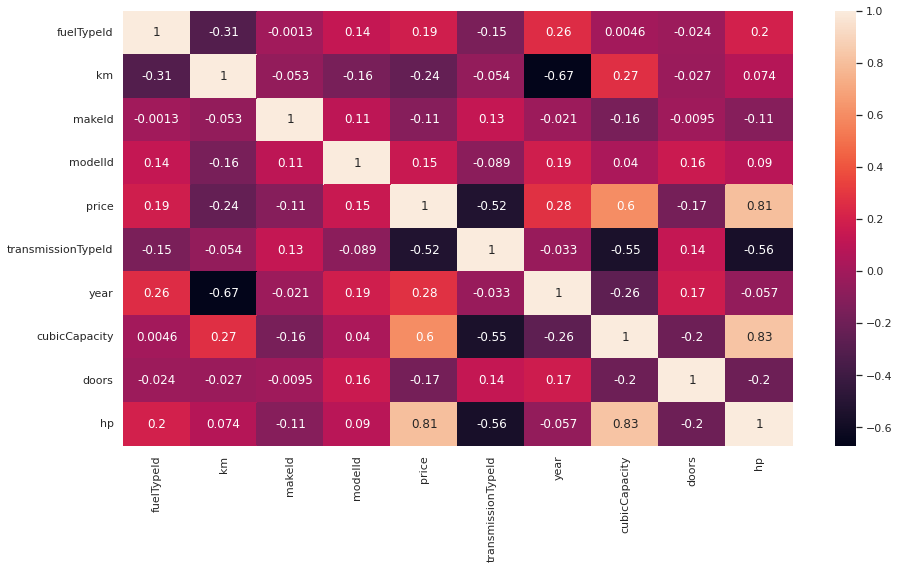

In [6]:
# mostrar un mapa de calor que indique la correlación entre variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True)

In [7]:
# separar datos entre datos y etiquetas(resultados)
x_df = df.drop('price', axis=1)
y_df = df['price']
# separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = 1, test_size=0.25)
df.head()

,fuelTypeId,km,makeId,modelId,price,transmissionTypeId,year,cubicCapacity,doors,hp
0,2,41080,46,322.0,10990,2.0,2015,1329.0,5.0,99.0
1,1,78576,48,285.0,17450,2.0,2016,1969.0,5.0,120.0
2,1,99999,7,70.0,20999,1.0,2015,1995.0,5.0,184.0
3,4,79000,15,39.0,19990,1.0,2016,1999.0,4.0,187.0
4,1,105000,28,8.0,31900,1.0,2016,2143.0,4.0,170.0


In [8]:
# elegir, instanciar y entrenar el modelo
arbol = DecisionTreeRegressor(criterion='squared_error', max_depth=7)
arbol.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [9]:
# realizar una predicción con los datos de prueba
y_predict = arbol.predict(x_test)

In [10]:
# mostrar el porcentaje de elementos correctamente clasficados
mean_squared_error(y_test, y_predict)

47788598.6007092

In [11]:
dump(arbol, 'modelo4.joblib') 

['modelo4.joblib']